In [1]:
import pandas as pd
import matplotlib_inline as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adeniranstephen/obesity-prediction-dataset")

print("Path to dataset files:", path)

# Update path to include the filename
file_path = path + '/ObesityDataSet_raw_and_data_sinthetic.csv'
# Assuming the file is directly inside the downloaded directory

df = pd.read_csv(file_path)

Path to dataset files: /kaggle/input/obesity-prediction-dataset


In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

**There is no null values**

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
df.duplicated().sum()  # 24

# Removing duplicated rows

df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [7]:
numerical_df = df.select_dtypes(include=['number'])
def get_outliers(coulmn_name):
  Q1=numerical_df[coulmn_name].quantile(0.25)
  Q3=numerical_df[coulmn_name].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  print(f"the number of outliers in {coulmn_name} is {numerical_df[(numerical_df[coulmn_name]<lower_bound) | (numerical_df[coulmn_name]>upper_bound)].shape[0]}")
for i in numerical_df.columns:
  get_outliers(i)
# I will reomve the one row outlier that have in the weight but the other when I apply nomaliztion won't affect the model perf

the number of outliers in Age is 160
the number of outliers in Height is 0
the number of outliers in Weight is 1
the number of outliers in FCVC is 0
the number of outliers in NCP is 578
the number of outliers in CH2O is 0
the number of outliers in FAF is 0
the number of outliers in TUE is 0


**Gender distribution**

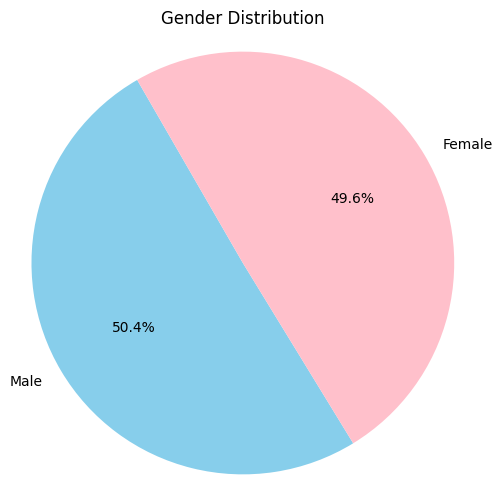

In [8]:
# Count values
gender_counts = df['Gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=120, colors=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()

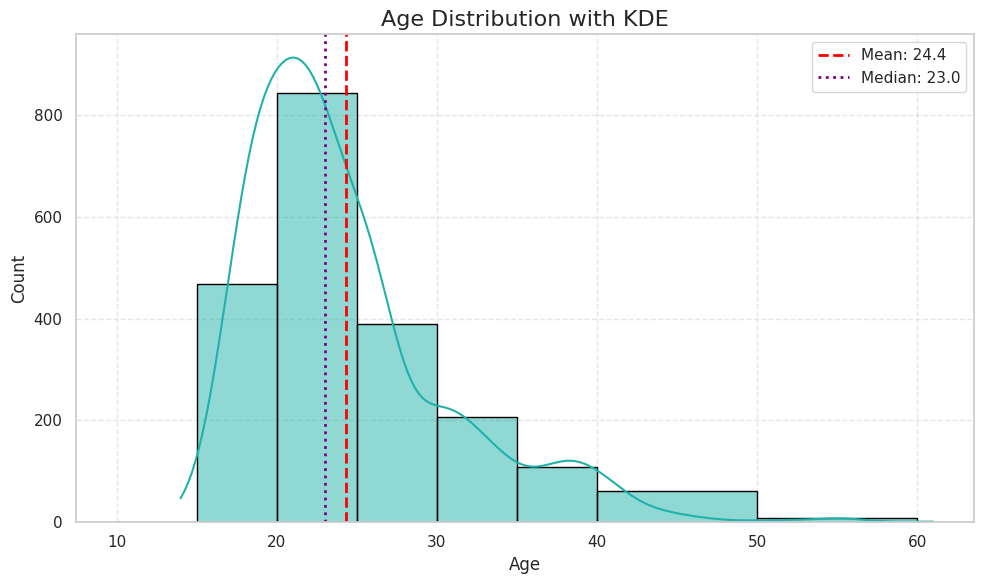

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
bins = [10, 15, 20, 25, 30, 35, 40, 50, 60]

sns.histplot(df['Age'], bins=bins, kde=True, color='lightseagreen', edgecolor='black', kde_kws={'bw_adjust': 1.2})

# Add mean and median lines
plt.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['Age'].mean():.1f}")
plt.axvline(df['Age'].median(), color='purple', linestyle=':', linewidth=2, label=f"Median: {df['Age'].median():.1f}")

# Titles and labels
plt.title('Age Distribution with KDE', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


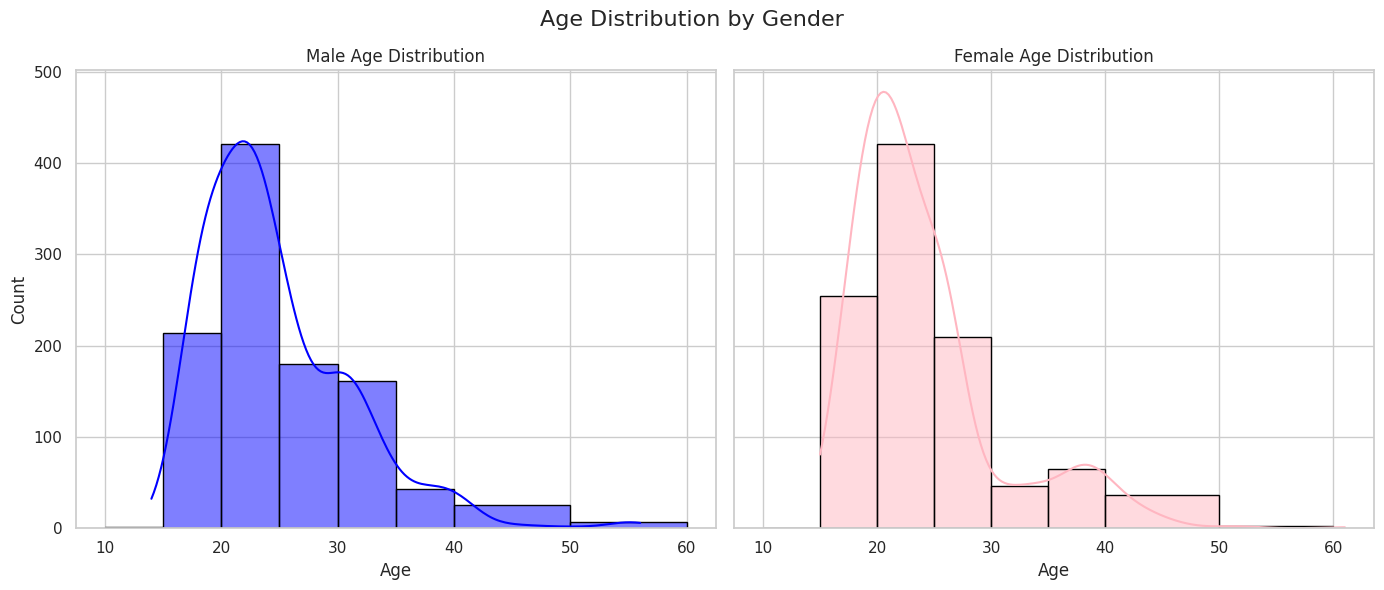

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
bins = [10, 15, 20, 25, 30, 35, 40, 50, 60]

# Male plot
sns.histplot(df[df['Gender'] == 'Male']['Age'], ax=axes[0], bins=bins,
             kde=True, color='Blue', edgecolor='black', kde_kws={'bw_adjust': 1.2})
axes[0].set_title('Male Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Female plot
sns.histplot(df[df['Gender'] == 'Female']['Age'], ax=axes[1], bins=bins,
             kde=True, color='lightpink', edgecolor='black', kde_kws={'bw_adjust': 1.2})
axes[1].set_title('Female Age Distribution')
axes[1].set_xlabel('Age')

# Overall title
plt.suptitle('Age Distribution by Gender', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust for suptitle spacing

plt.show()


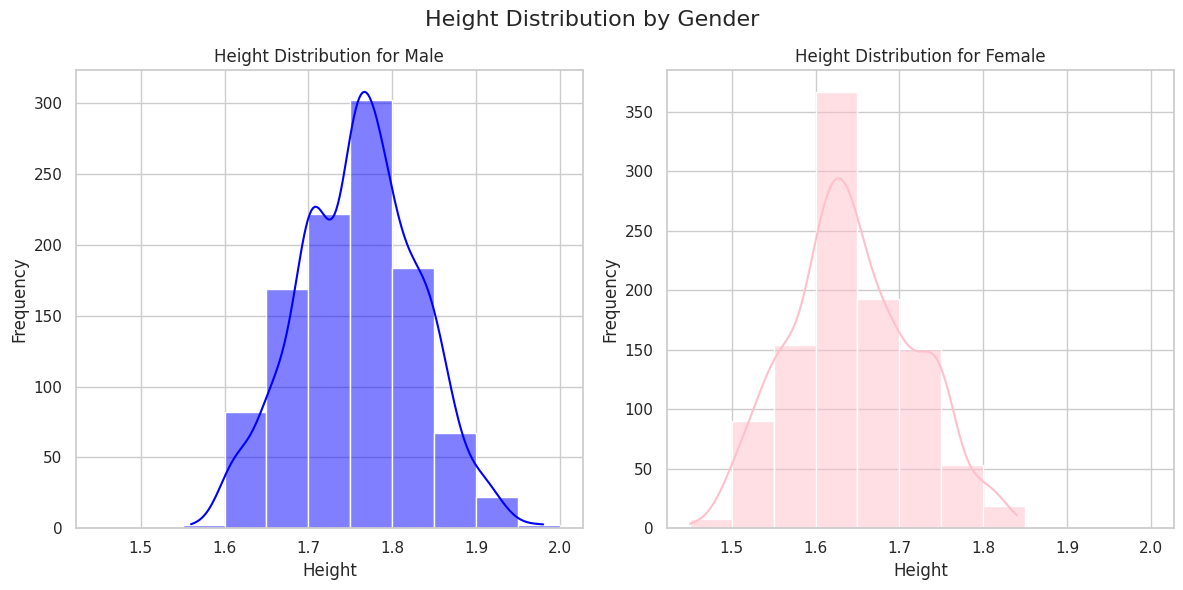

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have a DataFrame 'df' with columns 'height' and 'gender'

# Define custom bins
bins = np.arange(1.45, 2.05, 0.05)  # From 1.45 to 2.00 with step size of 0.05

# Create the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution for male
sns.histplot(df[df['Gender'] == 'Male']['Height'], bins=bins, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Height Distribution for Male')
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Frequency')

# Plot the distribution for female
sns.histplot(df[df['Gender'] == 'Female']['Height'], bins=bins, kde=True, color='pink', ax=axes[1])
axes[1].set_title('Height Distribution for Female')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.suptitle('Height Distribution by Gender', fontsize=16)
plt.subplots_adjust(top=0.88)  # Adjust for suptitle spacing

# Show the plots
plt.show()


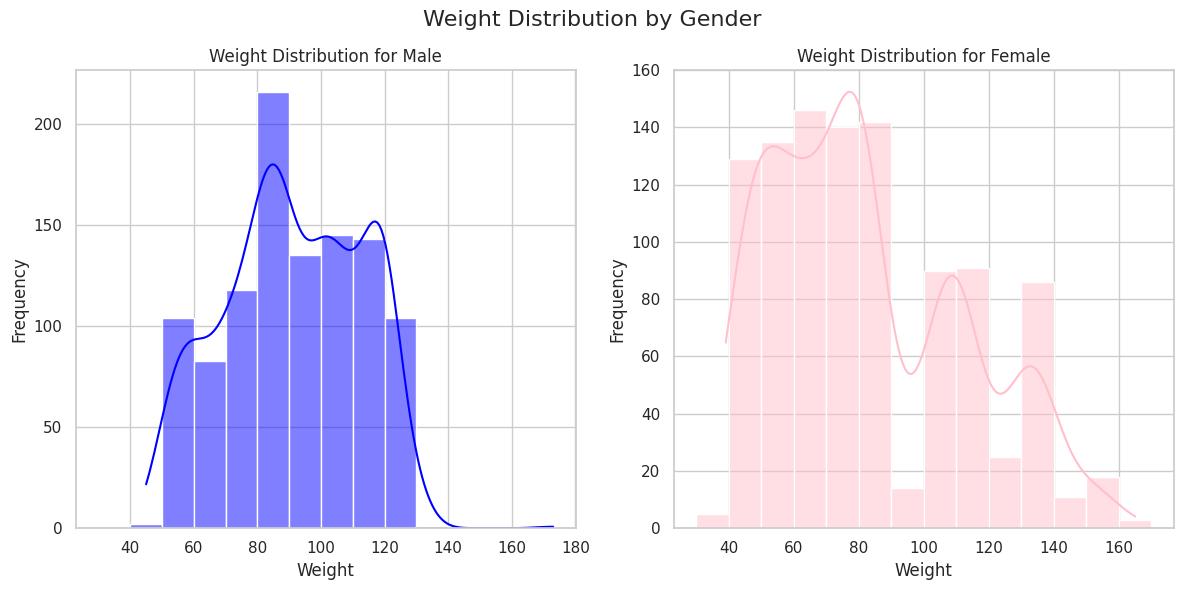

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have a DataFrame 'df' with columns 'Weight' and 'gender'

# Define custom bins
bins = np.arange(30, 180,10)  # From 1.45 to 2.00 with step size of 0.05

# Create the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution for male
sns.histplot(df[df['Gender'] == 'Male']['Weight'], bins=bins, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Weight Distribution for Male')
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Frequency')

# Plot the distribution for female
sns.histplot(df[df['Gender'] == 'Female']['Weight'], bins=bins, kde=True, color='pink', ax=axes[1])
axes[1].set_title('Weight Distribution for Female')
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.suptitle('Weight Distribution by Gender', fontsize=16)
plt.subplots_adjust(top=0.88)  # Adjust for suptitle spacing

# Show the plots
plt.show()


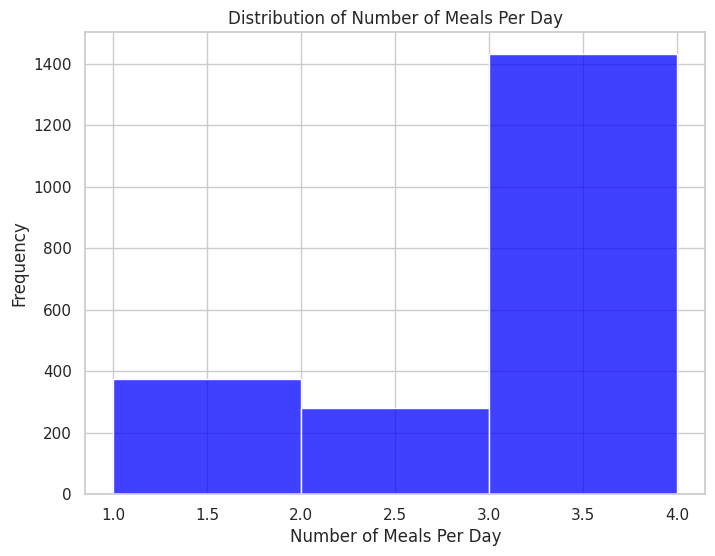

In [13]:
# Define the bins as 0, 1, 2, 3, 4
bins = [ 1, 2, 3, 4]

# Create the histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['NCP'], bins=bins, kde=False, color='blue')

# Customize the plot
plt.title('Distribution of Number of Meals Per Day')
plt.xlabel('Number of Meals Per Day')
plt.ylabel('Frequency')

# Show the plot
plt.show()

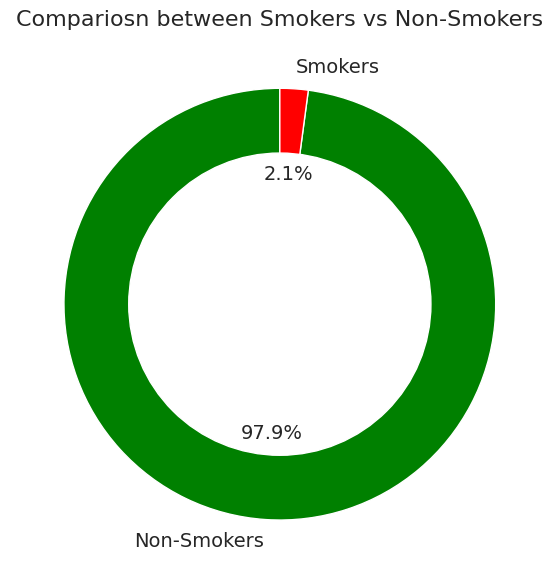

In [14]:
# Count the number of smokers and non-smokers
smoke_counts = df['SMOKE'].value_counts()

# Define labels and custom colors
labels = ['Non-Smokers', 'Smokers']
colors = ['green', 'red']

# Ensure the order matches the labels
# Adjust if necessary, assuming 0 = Non-Smoker, 1 = Smoker
smoke_values = [smoke_counts.get(0, 0), smoke_counts.get(1, 0)]

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(smoke_values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 14})

# Add a title
plt.title('Compariosn between Smokers vs Non-Smokers', fontsize=16)

# Draw a circle at the center to make it a donut chart (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Show the plot
plt.tight_layout()
plt.show()

# Clean the Data and prepare it

In [15]:
# Reomve the weghit outlier row
Q1=numerical_df['Weight'].quantile(0.25)
Q3=numerical_df['Weight'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df.drop(df[(df['Weight']<lower_bound) | (df['Weight']>upper_bound)].index,axis=0)
len(df[(df['Weight']<lower_bound) | (df['Weight']>upper_bound)])

0

**Time to change the catigrocal values**

**the unorderd feature**

In [16]:
df[['family_history_with_overweight','FAVC','SMOKE','SCC']]=df[['family_history_with_overweight','FAVC','SMOKE','SCC']].replace({'yes': 1, 'no': 0})
df['Gender']=df['Gender'].replace({'Male': 1, 'Female': 0})


**the orderd feature**


In [17]:
df[['CAEC','CALC']]=df[['CAEC','CALC']].replace({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})


In [18]:
# Create dummy variables for the 'MTRANS' column
df_mtrans_dummies = pd.get_dummies(df['MTRANS'], prefix='MTRANS', drop_first=False)

# Convert the dummy variables from boolean (True/False) to integer (1/0)
df_mtrans_dummies = df_mtrans_dummies.astype(int)

# Join the dummies with the original DataFrame
df = pd.concat([df, df_mtrans_dummies], axis=1)
df=df.drop('MTRANS',axis=1)

**encode the target value**

In [19]:
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

In [20]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21,1.62,64.0,1,0,2.0,3.0,1,0,...,0,0.0,1.0,0,1,0,0,0,1,0
1,0,21,1.52,56.0,1,0,3.0,3.0,1,1,...,1,3.0,0.0,1,1,0,0,0,1,0
2,1,23,1.80,77.0,1,0,2.0,3.0,1,0,...,0,2.0,1.0,2,1,0,0,0,1,0
3,1,27,1.80,87.0,0,0,3.0,3.0,1,0,...,0,2.0,0.0,2,5,0,0,0,0,1
4,1,22,1.78,89.8,0,0,2.0,1.0,1,0,...,0,0.0,0.0,1,6,0,0,0,1,0


# Choosing features

In [21]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the numeric columns
numeric_columns = ['Age', 'Height', 'Weight']

# Apply the scaler to the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [22]:
X=df.drop('NObeyesdad',axis=1)
y=df['NObeyesdad']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Fit a random forest model to the data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
importance_df

,Feature,Importance
3,Weight,0.315626
6,FCVC,0.094759
2,Height,0.089008
1,Age,0.087423
13,TUE,0.057014
7,NCP,0.055701
0,Gender,0.052938
10,CH2O,0.046931
12,FAF,0.045824
8,CAEC,0.033421


In [25]:
print('This Model using all feature\n')
from sklearn.metrics import classification_report, confusion_matrix
y_pred=model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

This Model using all feature

Confusion Matrix:
[[51  7  0  0  0  0  0]
 [ 1 59  0  0  0  0  0]
 [ 0  1 72  0  0  0  1]
 [ 0  0  0 70  0  0  0]
 [ 0  0  0  0 55  0  0]
 [ 0  4  0  0  0 46  2]
 [ 0  4  0  0  0  0 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        58
           1       0.79      0.98      0.87        60
           2       1.00      0.97      0.99        74
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        55
           5       1.00      0.88      0.94        52
           6       0.94      0.92      0.93        49

    accuracy                           0.95       418
   macro avg       0.96      0.95      0.95       418
weighted avg       0.96      0.95      0.95       418



In [26]:
X2=df.drop(['FAVC', 'MTRANS_Public_Transportation', 'MTRANS_Automobile', 'SCC',
       'MTRANS_Walking', 'SMOKE', 'MTRANS_Bike', 'MTRANS_Motorbike'],axis=1)
y2=df['NObeyesdad']

In [27]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [28]:
# Fit a random forest model to the data
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
print('Model without low-importance features')
from sklearn.metrics import classification_report, confusion_matrix
y_pred2=model2.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test2, y_pred2))

print("\nClassification Report:")
print(classification_report(y_test2, y_pred2))

Model without low-importance features
Confusion Matrix:
[[51  7  0  0  0  0  0]
 [ 1 59  0  0  0  0  0]
 [ 0  1 72  0  0  0  1]
 [ 0  0  0 70  0  0  0]
 [ 0  0  0  0 55  0  0]
 [ 0  4  0  0  0 46  2]
 [ 0  4  0  0  0  0 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        58
           1       0.79      0.98      0.87        60
           2       1.00      0.97      0.99        74
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        55
           5       1.00      0.88      0.94        52
           6       0.94      0.92      0.93        49

    accuracy                           0.95       418
   macro avg       0.96      0.95      0.95       418
weighted avg       0.96      0.95      0.95       418



### 📊 Feature Selection Impact on Model Performance

We evaluated the performance of a classification model trained on a dataset with all available features, and then compared it to the same model after removing low-importance features (based on feature importance scores from a Random Forest classifier).

---

#### ✅ Model with All Features


- **Accuracy:** `0.95`  
- **Macro avg F1-score:** `0.95`  
- **Weighted avg F1-score:** `0.95`

The model performs well across all classes, achieving a macro average F1-score of 0.95. However, some features with very low importance were included in the training, such as different `MTRANS_*` values with importance below 0.01.

---

#### ✅ Model after Removing Low-Importance Features


- **Accuracy:** `0.95`  
- **Macro avg F1-score:** `0.95`  
- **Weighted avg F1-score:** `0.95`

After removing features with very low importance (e.g., `MTRANS_Bike`, `MTRANS_Motorbike`, `SMOKE`, etc.), **the model maintained the exact same performance**, showing that these features did not contribute meaningfully to prediction accuracy.

---

### 🔍 Decision & Conclusion

Removing features with very low importance:

- ✅ Reduced model complexity.  
- ✅ Made training and inference slightly faster.  
- ✅ Did **not** hurt the model’s predictive performance.

> 💡 **Conclusion:**  
> It is recommended to **remove low-importance features** from the dataset when they do not impact performance. This leads to a more efficient and interpretable model without sacrificing accuracy.
